Import necessary tools

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Load data

In [14]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [15]:
df.shape

(20640, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [17]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


handing missing values

In [18]:
# fill missing values in feature (total_bedrooms) with its median value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [19]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


handling duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

no duplicates

In [22]:
# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Split data set to train and test

In [23]:
X = df.drop(['median_house_value'], axis= 1)   #Features
y = df['median_house_value']                   #Target

#for Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Train Models:

In [26]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
predict_linear = linear_regression.predict(X_test_scaled)

#calculate Mean Square Error, Mean Absolute Error and R2 Score for test data
mse_linear_test = mean_squared_error(y_test, predict_linear)
mae_linear_test = mean_absolute_error(y_test, predict_linear)
r2_linear_test = r2_score(y_test, predict_linear)

# Evaluation
print("Linear Regression Performance:")
print("MSE:", mse_linear_test)
print("MAE:", mae_linear_test)
print("R2 Score:", r2_linear_test)

Linear Regression Performance:
MSE: 4917037588.687494
MAE: 51083.738173166326
R2 Score: 0.6247707646746932


In [27]:
# Random Forest
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train, y_train)
predict_random = random_regressor.predict(X_test)

#calculate Mean Square Error, Mean Absolute Error and R2 Score for test data
mse_random_test = mean_squared_error(y_test, predict_random)
mae_random_test = mean_absolute_error(y_test, predict_random)
r2_random_test = r2_score(y_test, predict_random)

# Evaluation
print("Random Forest Performance:")
print("MSE:", mse_random_test)
print("MAE:", mae_random_test)
print("R2 Score:", r2_random_test)

Random Forest Performance:
MSE: 2385964739.384708
MAE: 31543.337134205427
R2 Score: 0.8179221312580107


/tmp/ipython-input-1973612610.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


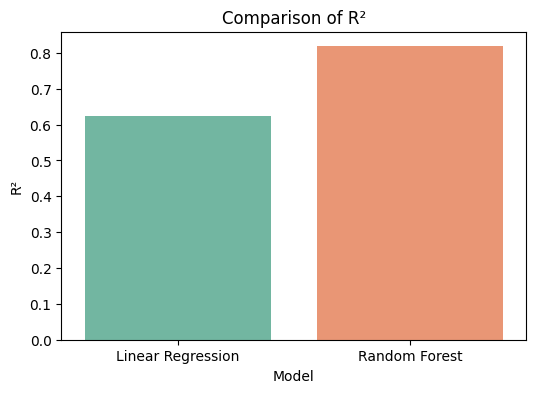

/tmp/ipython-input-1973612610.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


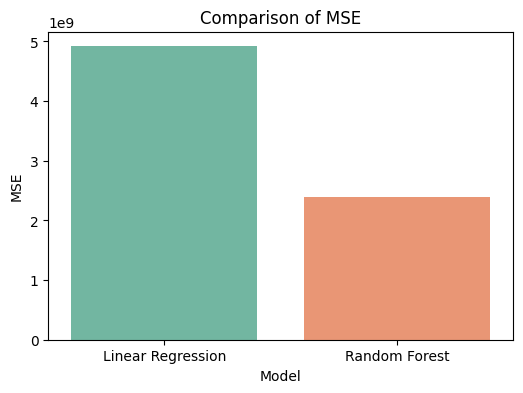

/tmp/ipython-input-1973612610.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


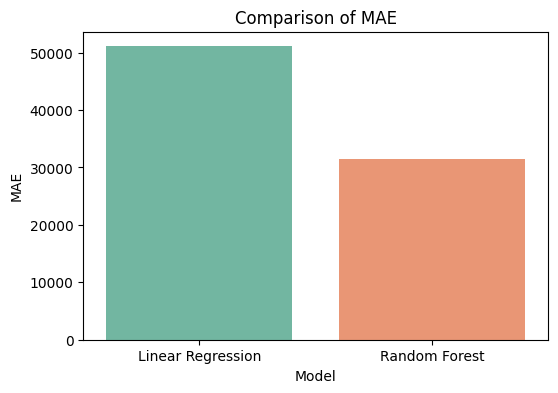

In [30]:
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "R²": [r2_linear_test, r2_random_test],
    "MSE": [mse_linear_test,mse_random_test],
    "MAE": [mae_linear_test,mae_random_test]
}

results_df = pd.DataFrame(results)

# Plot each metric separately
metrics = ["R²", "MSE", "MAE"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.show()

Random Forest Regressor has a higher R2 score and lower mean square error and mean absolute error, indicating better performance on this dataset.